In [ ]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


In [ ]:
data_dir = tf.keras.utils.get_file(
    'flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


 five subdirectories: dandelion, roses, tulips, daisy, and sunflowers.

In [ ]:
print(os.listdir(data_dir))

['roses', 'sunflowers', 'LICENSE.txt', 'tulips', 'daisy', 'dandelion']


In [ ]:
print(os.listdir(str(data_dir)+'/roses'))

['14810868100_87eb739f26_m.jpg', '1446090416_f0cad5fde4.jpg', '15319767030_e6c5602a77_m.jpg', '15032112248_30c5284e54_n.jpg', '7211616670_2d49ecb3a5_m.jpg', '15674450867_0ced942941_n.jpg', '17158274118_00ec99a23c.jpg', '14019883858_e5d2a0ec10_n.jpg', '8035908422_87220425d2_n.jpg', '14747962886_2bff6bb323_m.jpg', '4356781875_92c5cd93c0.jpg', '8524505546_b242bd4928_n.jpg', '9406573080_60eab9278e_n.jpg', '6039330368_c30ed224c4_m.jpg', '14414100710_753a36fce9.jpg', '3292434691_392071d702_n.jpg', '5273722065_c85d8543c2_m.jpg', '2215318403_06eb99176a.jpg', '172311368_49412f881b.jpg', '15255964454_0a64eb67fa.jpg', '4504220673_af754fcb40_n.jpg', '505517255_cfbb6f6394.jpg', '6347846935_51e3dc2481_n.jpg', '2273917656_6d6c038283.jpg', '8775267816_726ddc6d92_n.jpg', '5206847130_ee4bf0e4de_n.jpg', '5777669976_a205f61e5b.jpg', '14001990976_bd2da42dbc.jpg', '4713531680_1110a2fa07_n.jpg', '14154164774_3b39d36778.jpg', '494803274_f84f21d53a.jpg', '5570018782_c56bee942f.jpg', '9404876600_04f6d37685.jpg'

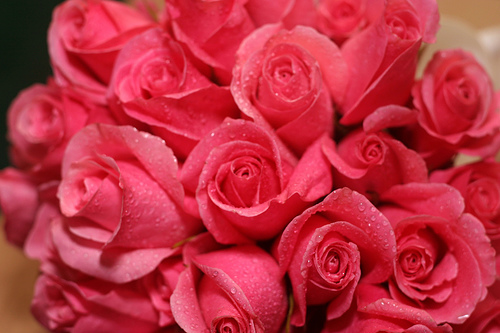

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

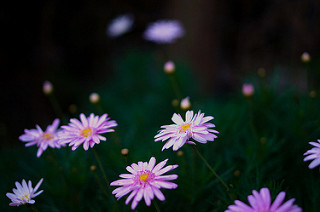

In [ ]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[2]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


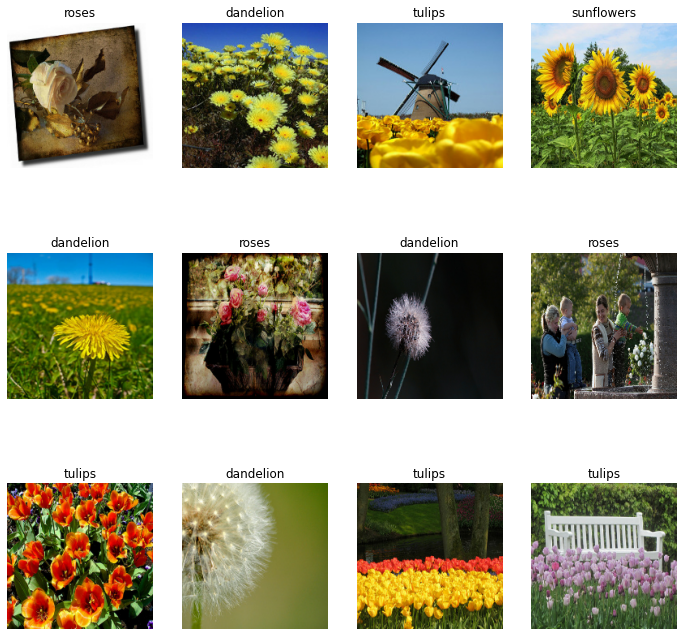

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = len(class_names)

- The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

- ReLU helps to prevent the exponential growth in the computation required to operate the neural network

- The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.

- Conv2D layers are generally used for achieving high accuracy in image 
  recognition tasks. However, they require a lot of calculations 
  to be done and are very RAM intensive. Dilated or Atrous Convolutions 
  reduces the complexity of the convolution operation.

- Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. Dense Layer is used to classify image based on output from convolutional layers. Working of single neuron. A layer contains multiple number of such neurons.

- The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. That is, softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.



In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, 
  input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

• optimizer – We chose Adam as the optimizer. It will increase and improve the convolution neural network’s performance. It also manages any training errors that the CNN may have.

• loss – This is the function that collects all the errors that the CNN experiences while training. Because the image dataset has various classes, we apply SparseCategoricalCrossentropy (five classes).

• metrics – This function calculates the total CNN accuracy score after training. We set its value to accuracy.

- Adam optimizer involves a combination of two gradient descent methodologies: Momentum: This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the 'exponentially weighted average' of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs=15
history_model = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 227s 2s/step - loss: 0.0154 - accuracy: 0.9963 - val_loss: 2.0148 - val_accuracy: 0.6512
Epoch 2/15
92/92 [==============================] - 276s 3s/step - loss: 0.0217 - accuracy: 0.9963 - val_loss: 1.9921 - val_accuracy: 0.6376
Epoch 3/15
92/92 [==============================] - 227s 2s/step - loss: 0.0172 - accuracy: 0.9963 - val_loss: 2.1329 - val_accuracy: 0.6458
Epoch 4/15
92/92 [==============================] - 192s 2s/step - loss: 0.0176 - accuracy: 0.9959 - val_loss: 2.2438 - val_accuracy: 0.6417
Epoch 5/15
92/92 [==============================] - 200s 2s/step - loss: 0.0297 - accuracy: 0.9922 - val_loss: 2.2319 - val_accuracy: 0.6444
Epoch 6/15
92/92 [==============================] - 198s 2s/step - loss: 0.0456 - accuracy: 0.9854 - val_loss: 2.0182 - val_accuracy: 0.6471
Epoch 7/15
92/92 [==============================] - 204s 2s/step - loss: 0.0355 - accuracy: 0.9901 - val_loss: 2.5553 - val_accuracy: 0.6063
Epoch 8/15
92

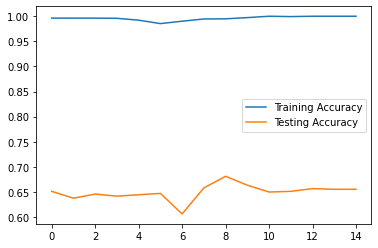

In [ ]:
plt.plot(history_model.history['accuracy'] ,label='Training Accuracy')
plt.plot(history_model.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

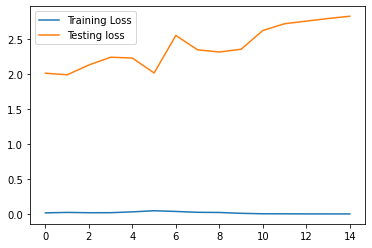

In [ ]:
plt.plot(history_model.history['loss'] ,label='Training Loss')
plt.plot(history_model.history['val_loss'],label='Testing loss')
plt.legend()

In [ ]:
def predict_input_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 34.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 KB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.4/273.4 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
for images, labels in val_ds.take(1):
  for i in range(12):
    print(predict_input_image(images[i].numpy()))
    

1/1 [==============================] - 0s 113ms/step
{'daisy': 2.8527896191177238e-12, 'dandelion': 1.6938696972834677e-11, 'roses': 1.177824131559646e-07, 'sunflowers': 2.7143391700956698e-11, 'tulips': 0.9999998807907104}
1/1 [==============================] - 0s 85ms/step
{'daisy': 1.5973941613900422e-10, 'dandelion': 3.590430175393067e-10, 'roses': 2.8228873460989234e-08, 'sunflowers': 0.9999949932098389, 'tulips': 4.989114131603856e-06}
1/1 [==============================] - 0s 93ms/step
{'daisy': 0.0001141431275755167, 'dandelion': 0.9998596906661987, 'roses': 4.455111195511563e-07, 'sunflowers': 2.272563932592675e-07, 'tulips': 2.5348512281198055e-05}
1/1 [==============================] - 0s 95ms/step
{'daisy': 1.7854994149857362e-09, 'dandelion': 6.133292116371203e-13, 'roses': 0.999987006187439, 'sunflowers': 2.0203678730013053e-08, 'tulips': 1.2955874808540102e-05}
1/1 [==============================] - 0s 50ms/step
{'daisy': 1.0, 'dandelion': 2.048268672727449e-12, 'roses':

In [ ]:
import gradio as gr

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

/root/venv/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/root/venv/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [ ]:
gr.Interface(fn=predict_input_image, 
inputs=image, outputs=label,interpretation='default').launch(debug='True', share='True')

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://12472.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 163ms/step
Traceback (most recent call last):
  File "/root/venv/lib/python3.9/site-packages/gradio/components.py", line 1487, in _segment_by_slic
    from skimage.segmentation import slic
ModuleNotFoundError: No module named 'skimage'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/root/venv/lib/python3.9/site-packages/gradio/routes.py", line 255, in run_predict
    output = await app.blocks.process_api(
  File "/root/venv/lib/python3.9/site-packages/gradio/blocks.py", line 546, in process_api
    predictions, duration = await self.call_function(fn_index, processed_input)
  File "/root/venv/lib/python3.9/site-packages/gradio/blocks.py", line 461, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/root/venv/lib/python3.9/site-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/root/venv/lib

(<gradio.routes.App at 0x7f54d2d69280>,
 'http://127.0.0.1:7860/',
 'https://12472.gradio.app')

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [ ]:
# Flask code
from tensorflow.keras.models import model_from_json 
json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded Model from disk")




Loaded Model from disk


In [ ]:
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
def predict_input_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:
for images, labels in val_ds.take(1):
  for i in range(12):
    print(loaded_model.predict(images[i].numpy().reshape(-1,180,180,3)))

1/1 [==============================] - 0s 261ms/step
[[1.1414313e-04 9.9985969e-01 4.4551112e-07 2.2725639e-07 2.5348512e-05]]
1/1 [==============================] - 0s 96ms/step
[[7.9711594e-02 9.0689361e-01 1.8192708e-04 3.6761669e-08 1.3212903e-02]]
1/1 [==============================] - 0s 74ms/step
[[1.0669610e-02 9.3556190e-01 1.5449569e-04 5.2277034e-04 5.3091250e-02]]
1/1 [==============================] - 0s 85ms/step
[[2.6719080e-11 3.1688708e-06 7.9019093e-09 9.9994743e-01 4.9382677e-05]]
1/1 [==============================] - 0s 96ms/step
[[4.2817029e-04 3.9219733e-02 1.8157515e-01 2.4518237e-10 7.7877700e-01]]
1/1 [==============================] - 0s 80ms/step
[[2.7340575e-04 9.9972528e-01 1.2888662e-06 3.6422306e-12 5.2998187e-12]]
1/1 [==============================] - 0s 72ms/step
[[9.2617355e-02 1.1185046e-05 9.0733039e-01 5.8047722e-10 4.1119536e-05]]
1/1 [==============================] - 0s 74ms/step
[[8.4537843e-09 1.0000000e+00 9.0520752e-10 9.2073786e-11 5.64244

In [ ]:
!pip install flask==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 28.3 MB/s eta 0:00:00
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Not uninstalling jinja2 at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'Jinja2'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f5c31db7-b0c2-4b04-bf11-feeabc42f5ad' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>